First we import the required libraries, numpy for calculational stuff, pandas for dataset, matplotlib for plotting.
Then import the dataset, and take an overview of it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#here path is the same folder as this notebook
path="Task2_dataset.csv"
df=pd.read_csv(path)
df

,song_id,keyword_1,keyword_2,keyword_3,genre
0,74,guitar,happy,distorted,rock
1,103,brass,energetic,melodic,classical
2,201,banjo,happy,acoustic,country
3,194,synth,energetic,heavy,hip-hop
4,184,synth,energetic,slow,hip-hop
...,...,...,...,...,...
142,195,synth,angry,melodic,hip-hop
143,7,guitar,energetic,fast,pop
144,14,guitar,happy,rhythmic,pop
145,36,synth,mellow,danceable,pop


Overview of the arrays made and used ahead:
sentences= an array whose each element itself is an array containing the value keyword_1, keyword_2, keyword_3 for each song.
true_genres= array containing the labels for actual genres for each song - we require this later to calculate confusion matrix

word_set= it is like a vocab, it contains all the unique words(from keyword 1,2,3) in the dataset.
index_dict= this is a dictionary which maps each word in the word_set to a number (index), this would be used for BoW and Tf-Idf matrix calculations

In [3]:
k1 = df['keyword_1'].to_numpy()
k2=df['keyword_2'].to_numpy()
k3= df['keyword_3'].to_numpy()
true_genres=df['genre'].to_numpy()

In [35]:
print(f"Vocab keyword 1: {set(k1)}, Size of vocab: {len(set(k1))}")
print(f"Vocab keyword 2: {set(k2)},Size of vocab: {len(set(k2))}")
print(f"Vocab keyword 3: {set(k3)}, Size of vocab: {len(set(k3))}")

Vocab keyword 1: {'violin', 'piano', 'guitar', 'synth', 'banjo', 'brass'}, Size of vocab: 6
Vocab keyword 2: {'mellow', 'nostalgic', 'upbeat', 'happy', 'energetic', 'sad', 'calm', 'angry', 'emotional'},Size of vocab: 9
Vocab keyword 3: {'fast', 'melodic', 'heavy', 'acoustic', 'slow', 'distorted', 'rhythmic', 'twangy', 'upbeat', 'danceable'}, Size of vocab: 10


In [4]:
def create_index_dict(keywords):
    word_set = set(keywords)
    index_dict = {word: i for i, word in enumerate(word_set)}
    return index_dict, word_set

In [5]:
index_dict = []
word_set = []

for keywords in [k1, k2, k3]:
    idx_dict, w_set = create_index_dict(keywords)
    index_dict.append(idx_dict)
    word_set.append(w_set)

BoW Matrix: 

In [6]:
def create_bow_matrix(keywords, word_set, index_dict):
    bow_matrix = np.zeros((len(keywords), len(word_set)), dtype=int)
    for i, word in enumerate(keywords):
        bow_matrix[i, index_dict[word]] += 1
    return bow_matrix

In [36]:
bow_matrix_k1=create_bow_matrix(k1,word_set[0], index_dict[0])
bow_matrix_k2=create_bow_matrix(k2,word_set[1], index_dict[1])
bow_matrix_k3=create_bow_matrix(k3,word_set[2], index_dict[2])
print(bow_matrix_k1[:5])

[[0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]]


Tf_Idf Matrix:

In [8]:
def count_dict(keywords, word_set):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for keyword in keywords:
            if word in keyword:
                word_count[word] += 1
    return word_count
 
word_count_k1 = count_dict(k1, word_set[0])
word_count_k2 = count_dict(k2, word_set[1])
word_count_k3 = count_dict(k3, word_set[2])

In [9]:
def termfreq(keywords, word):
    N = len(keywords)
    occurance = len([x for x in keywords if x == word])
    return occurance/N
def inverse_doc_freq(keywords, word, word_count):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(len(keywords)/word_occurance)
def tf_idf(keywords, word_set, index_dict):
    tf_idf_arr = np.zeros((len(word_set),))
    for word in keywords:
        tf = termfreq(keywords,word)
        idf = inverse_doc_freq(keywords, word, word_set)
         
        value = tf*idf
        tf_idf_arr[index_dict[word]] = value 
    return tf_idf_arr

In [10]:
def create_tf_idf_matrix(keywords, word_set, index_dict):
    return [tf_idf(keywords, word_set, index_dict) for _ in keywords]

In [11]:
tf_idf_k1=create_tf_idf_matrix(k1, word_set[0], index_dict[0])
tf_idf_k2=create_tf_idf_matrix(k2, word_set[1], index_dict[1])
tf_idf_k3=create_tf_idf_matrix(k3, word_set[2], index_dict[2])
print(tf_idf_k1[:5])

[array([0.33948521, 0.40738225, 2.20665386, 1.4597864 , 0.20369113,
       0.37343373]), array([0.33948521, 0.40738225, 2.20665386, 1.4597864 , 0.20369113,
       0.37343373]), array([0.33948521, 0.40738225, 2.20665386, 1.4597864 , 0.20369113,
       0.37343373]), array([0.33948521, 0.40738225, 2.20665386, 1.4597864 , 0.20369113,
       0.37343373]), array([0.33948521, 0.40738225, 2.20665386, 1.4597864 , 0.20369113,
       0.37343373])]


PCA: 

In [12]:
def pca(X, n_components=2):
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean
    covariance_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigentf_idf_arr = np.linalg.eig(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigentf_idf_arr = eigentf_idf_arr[:, sorted_indices]
    principal_components = eigentf_idf_arr[:, :n_components]
    X_reduced = np.dot(X_centered, principal_components)
    
    return X_reduced

In [13]:
red_bow_k1=pca(bow_matrix_k1)
red_bow_k2=pca(bow_matrix_k2)
red_bow_k3=pca(bow_matrix_k3)

Combine embeddings: 

In [105]:
def cosine_similarity(A, B):
    """Compute cosine similarity row-wise for 2D matrices A and B."""
    dot_product = np.sum(A * B, axis=1)  # Element-wise multiplication and sum along axis 1
    norm_A = np.linalg.norm(A, axis=1)  # Compute row-wise norms
    norm_B = np.linalg.norm(B, axis=1)
    return dot_product / (norm_A * norm_B + 1e-10)  # Avoid division by zero

def combine_embeddings_2(red_bow, red_tf_idf, red_custom, method="average"):
    if method == "average":
        combined_embedding = (red_bow + red_tf_idf + red_custom) / 3
    elif method == "mult":
        combined_embedding = red_bow * red_tf_idf * red_custom
    elif method == "cos":
        cos1 = cosine_similarity(red_bow, red_tf_idf)  # Shape (147,)
        cos2 = cosine_similarity(red_tf_idf, red_custom)  # Shape (147,)
        cos3 = cosine_similarity(red_bow, red_custom)  # Shape (147,)
        combined_embedding = np.column_stack(((cos1 + cos3) / 2, (cos2 + cos3) / 2))  # Shape (147,2)
    else:
        raise ValueError("Invalid combination method")

    return combined_embedding


# Example usage
final_embeddings_2 = combine_embeddings_2(red_bow_k1, red_bow_k2, red_bow_k3, method="cos")

print("\nFinal Combined 2D Embeddings:\n", final_embeddings_2[:9])



Final Combined 2D Embeddings:
 [[ 0.21936541 -0.27755328]
 [-0.61019172  0.22867455]
 [ 0.40343768  0.46059652]
 [ 0.26171187 -0.49384146]
 [ 0.20038157 -0.58683021]
 [ 0.35966962  0.3143056 ]
 [-0.34329177  0.14336564]
 [ 0.22354655 -0.26864375]
 [ 0.26867623 -0.21702107]]


In [116]:
def combine_embeddings(red_bow, red_tf_idf, red_custom, method="average"):
    if method == "average":
        combined_embedding = (red_bow + red_tf_idf + red_custom) / 3
    elif method == "mult":
        combined_embedding = red_bow * red_tf_idf * red_custom
    else:
        raise ValueError("Invalid combination method")

    return combined_embedding

final_embeddings = combine_embeddings(red_bow_k1, red_bow_k2, red_bow_k3, method="mult")

print("\nFinal Combined 2D Embeddings:\n", final_embeddings[:9])



Final Combined 2D Embeddings:
 [[-0.00788067 -0.00134858]
 [-0.03283089  0.2646087 ]
 [ 0.0025036   0.00467962]
 [-0.00430739  0.02009189]
 [-0.01664539  0.16875274]
 [-0.00028784 -0.00350906]
 [ 0.11221088 -0.0650861 ]
 [-0.01012734 -0.00180551]
 [-0.05795288 -0.20859212]]


In [122]:
def z_score_normalize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0, ddof=0)  # Population standard deviation
    return ((data - mean) / std)  # Ensuring shape remains (147,2)

# Apply normalization
normalized_data = z_score_normalize(final_embeddings_2)

# Print first 5 rows
print(normalized_data[:5])


[[ 0.50651835 -0.48465254]
 [-1.21892163  0.61967399]
 [ 0.88938007  1.12560742]
 [ 0.59459701 -0.95648115]
 [ 0.46703286 -1.15933437]]


In [123]:
def kmeans(data, k, max_iters=100000, tol=1e-6):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for i in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids

k = 5
labels, centroids = kmeans(normalized_data, k)

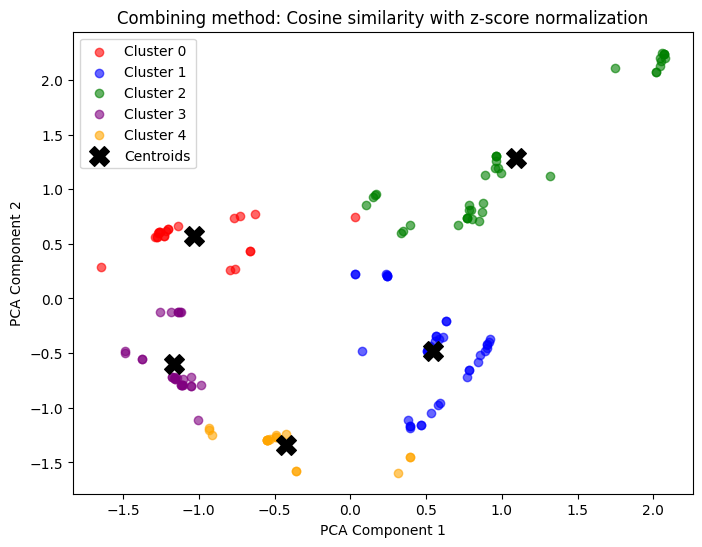

In [124]:
# Scatter plot
plt.figure(figsize=(8, 6))

# Assign unique colors to clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black', 'yellow']

# Plot each cluster with different colors
for cluster_id in range(k):
    cluster_points = normalized_data[labels == cluster_id]  # Select points in this cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], 
            color='black', marker='X', s=200, label='Centroids')

# Titles & Legends
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Combining method: Cosine similarity with z-score normalization")
plt.legend()
plt.show()


In [125]:
unique_genres = np.unique(true_genres)  # Example: ['classical', 'jazz', 'pop', 'rock', 'electronic']

# Create a DataFrame to store percentage distributions
cluster_distribution = pd.DataFrame(0, index=range(k), columns=unique_genres)

# Count occurrences of each genre in each cluster
for cluster_id in range(k):
    cluster_songs = true_genres[labels == cluster_id]  # Get true genres in the current cluster
    for genre in unique_genres:
        cluster_distribution.loc[cluster_id, genre] = np.sum(cluster_songs == genre)

# Convert to percentage
cluster_distribution_percentage = cluster_distribution.div(cluster_distribution.sum(axis=1), axis=0) * 100

# Display the percentage distribution per cluster
print(cluster_distribution_percentage)


   classical    country    hip-hop        pop       rock
0  27.272727  27.272727   9.090909   4.545455  31.818182
1  10.000000  10.000000  40.000000  27.500000  12.500000
2  26.315789  18.421053  18.421053  26.315789  10.526316
3  10.714286  25.000000  14.285714  17.857143  32.142857
4  21.052632  26.315789   5.263158  21.052632  26.315789


In [126]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
sil_score = silhouette_score(normalized_data, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5260


In [142]:
# Assume `true_genres` contains the actual genre labels of the songs in the dataset
# Assume `labels` is the K-Means assigned cluster for each song
# `true_genres` and `labels` should be aligned (same order)

k = 5  # Number of clusters
unique_genres = np.unique(true_genres)  # List of actual genres

# Create a confusion matrix: cluster vs. genre counts
cluster_distribution = pd.DataFrame(0, index=range(k), columns=unique_genres)

for i in range(len(true_genres)):
    cluster_distribution.loc[labels[i], true_genres[i]] += 1  # Increment count

print(cluster_distribution)

# Assign the most common genre in each cluster
cluster_to_genre = cluster_distribution.idxmax(axis=1).to_dict()
print("Cluster to Genre Mapping:", cluster_to_genre)

   classical  country  hip-hop  pop  rock
0          6        6        2    1     7
1          4        4       16   11     5
2         10        7        7   10     4
3          3        7        4    5     9
4          4        5        1    4     5
Cluster to Genre Mapping: {0: 'rock', 1: 'hip-hop', 2: 'classical', 3: 'rock', 4: 'country'}


In [143]:
cluster_to_genre[3]='pop'
print(cluster_to_genre)

{0: 'rock', 1: 'hip-hop', 2: 'classical', 3: 'pop', 4: 'country'}


In [144]:
new_songs=[['piano', 'calm', 'slow'], ['guitar', 'emotional', 'distorted'], ['synth', 'mellow', 'distorted']]

In [146]:
k1_new=[]
k2_new=[]
k3_new=[]
for song in new_songs:
    k1_new.append(song[0])
    k2_new.append(song[1])
    k3_new.append(song[2])
bow_new_k1=create_bow_matrix(k1_new,word_set[0], index_dict[0])
bow_new_k2=create_bow_matrix(k2_new,word_set[1], index_dict[1])
bow_new_k3=create_bow_matrix(k3_new,word_set[2], index_dict[2])

red_bow_new_k1=pca(bow_new_k1)
red_bow_new_k2=pca(bow_new_k2)
red_bow_new_k3=pca(bow_new_k3)

final_embeddings_new = combine_embeddings_2(red_bow_new_k1, red_bow_new_k2, red_bow_new_k3, method="cos")
normalized_new_embeddings=z_score_normalize(final_embeddings_new)

In [147]:
print(normalized_new_embeddings)

[[-1.41231304 -0.29555461]
 [ 0.76963024  1.34547744]
 [ 0.64268279 -1.04992283]]


In [25]:
def closest_cluster(data_point, centroids):
    return np.argmin(np.linalg.norm(centroids - data_point, axis=1))  # Compute & return closest cluster index

In [139]:
correct=0
for i in range(len(normalized_data)):
    cluster_idx = closest_cluster(normalized_data[i], centroids)
    if cluster_to_genre[cluster_idx]==true_genres[i]:
        correct+=1
print(correct*100/len(normalized_data))

29.25170068027211


In [151]:
for i,data in enumerate(normalized_new_embeddings):
    cluster_idx = closest_cluster(data, centroids)
    print(f"Keywords: {new_songs[i]}  Genre: {cluster_to_genre[cluster_idx]}")

Keywords: ['piano', 'calm', 'slow']  Genre: pop
Keywords: ['guitar', 'emotional', 'distorted']  Genre: classical
Keywords: ['synth', 'mellow', 'distorted']  Genre: hip-hop


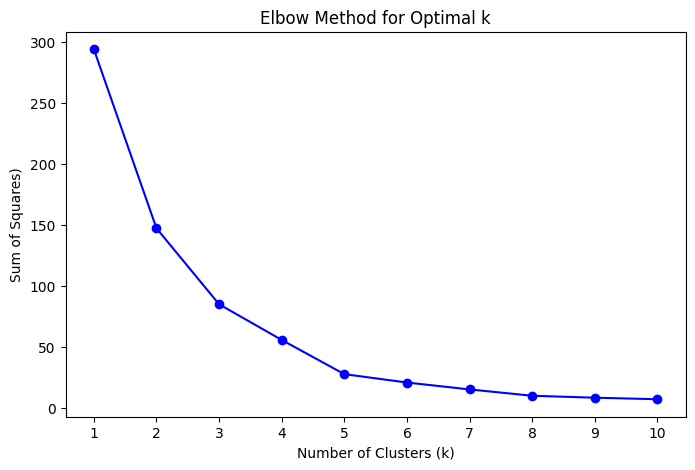

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to compute K-Means inertia for different values of k
def elbow_method(data, max_k=10):
    inertia_values = []
    k_values = range(1, max_k+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.figure(figsize=(8,5))
    plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Sum of Squares)")
    plt.title("Elbow Method for Optimal k")
    plt.xticks(k_values)
    plt.show()

# Run elbow method on your dataset
elbow_method(normalized_data, max_k=10)